In [1]:
import numpy
import matplotlib.pyplot as plt

In [16]:
#2d burgers' equation

nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


In [17]:
u=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2

v=numpy.ones((ny,nx))
v[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2


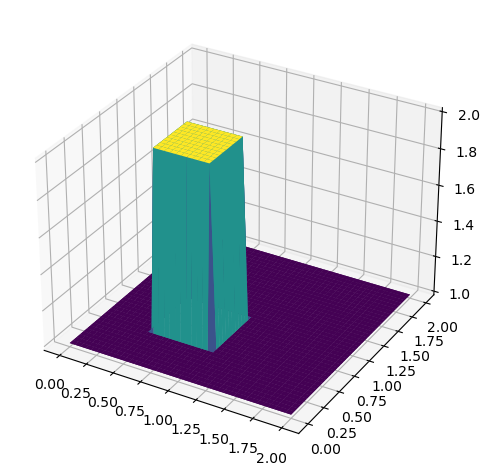

In [18]:
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)
X,Y=numpy.meshgrid(x,y)
plt.figure(figsize=(11,6),dpi=100)
ax=plt.axes(projection="3d")
ax.plot_surface(X,Y,u,cmap=plt.cm.viridis)
ax.plot_surface(X,Y,v,cmap=plt.cm.viridis)

In [24]:
#the problem is always in variable declarations it leads to a lot of errors thats the issue in explicit solutions
u=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2

v=numpy.ones((ny,nx))
v[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2
for n in range(nt+1):
    un=u.copy()
    vn=v.copy()

    u[1:-1,1:-1]=(un[1:-1,1:-1]-
                dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])-
                dt/dy*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])+
                nu*dt/dx**2 *
                (un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+
                nu*dt/dy**2 *
                (un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])) 
    
    #boundary conditions
    u[0,:]=1
    u[-1,:]=1
    u[:,0]=1
    u[:,-1]=1

    v[0,:]=1
    v[-1,:]=1
    v[:,0]=1
    v[:,-1]=1

                

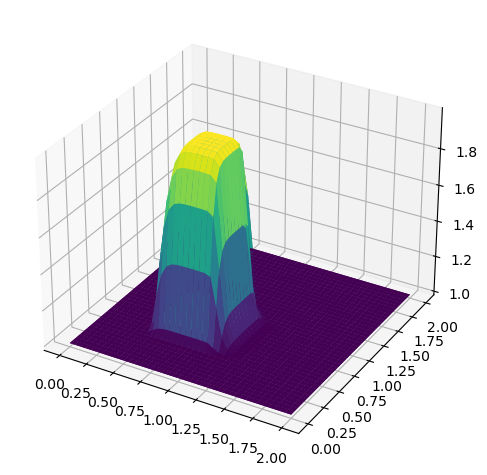

In [27]:
plt.figure(figsize=(11,6),dpi=100)
ax=plt.axes(projection="3d")
ax.plot_surface(X,Y,u,cmap=plt.cm.viridis)
ax.plot_surface(X,Y,v,cmap=plt.cm.viridis)

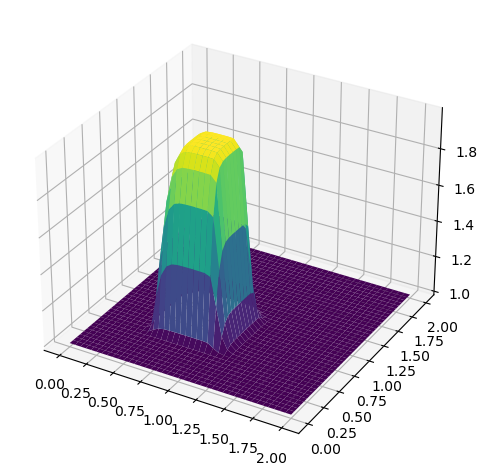